In [22]:
import harp
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from functools import reduce
import utils
import numpy as np

h1_reader = harp.create_reader('h1-device.yml', epoch=harp.REFERENCE_EPOCH)

root_folder = r'D:/rotation_exp/B3M7/2024-09-17T12-43-01/'

h1_datafolder = r'D:/rotation_exp/B3M7/2024-09-17T12-43-01/HarpDataH1/'

In [23]:
# read experiment metadata
session_settings = utils.load(session_data_reader, root_folder)

print(session_settings)

                                                                     metadata
1904-01-05 23:36:51.290240  {'motorSettings': {'nominalPulseInterval': 200...


                            OpticalTrackingRead0X  OpticalTrackingRead0Y  \
Time                                                                       
1904-01-05 23:36:51.290240                    283                    328   
1904-01-05 23:36:51.300256                    265                    323   
1904-01-05 23:36:51.310240                    275                    327   
1904-01-05 23:36:51.320256                    288                    325   
1904-01-05 23:36:51.330240                    316                    331   
...                                           ...                    ...   
1904-01-05 23:42:11.050240                     42                    107   
1904-01-05 23:42:11.060256                     70                    153   
1904-01-05 23:42:11.070240                      0                      0   
1904-01-05 23:42:11.080256                     74                     76   
1904-01-05 23:42:11.090240                     42                    104   

           

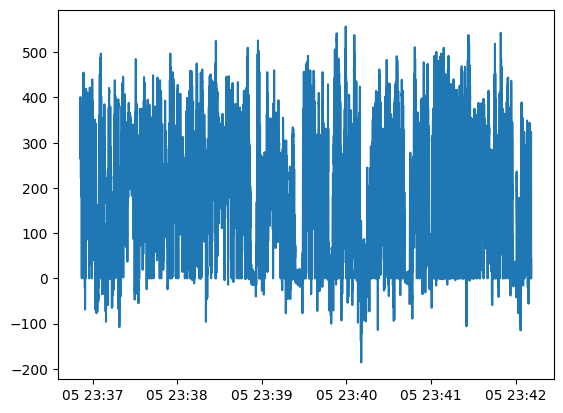

In [24]:
# read harp stream
flow_sensor = utils.load_harp(h1_reader.OpticalTrackingRead, h1_datafolder)
print(flow_sensor)
print(flow_sensor.index)

plt.figure()
plt.plot(flow_sensor['OpticalTrackingRead0X'])

In [25]:
# Convert to a playback file
output_data = np.asarray(flow_sensor['OpticalTrackingRead0X'], dtype=np.int16)

flow_sensor['OpticalTrackingRead0X'].to_csv('playback_file.csv', header=False, sep=',', lineterminator='\n')
